In [1]:
import tensorflow as tf

/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pedro/anaconda3/

In [2]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception
from keras.applications import VGG16
from keras.applications import VGG19

from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input

from keras.preprocessing.image import load_img

import numpy as np
import cv2

Using TensorFlow backend.


In [12]:
# path to the input image
image_path = './datasets/images/panamera.jpg'
# name of the pre-trained network to use
model = 'vgg16'

In [13]:
# define a dictionary that maps model names to their classes inside Keras
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception,
    "resnet": ResNet50
}

In [14]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image processing function
if model in ("inception", "xception"):
    inputShape = (299, 299)
    preprocess = preprocess_input

In [15]:
# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(model))
Network = MODELS[model]
model = Network(weights="imagenet")

[INFO] loading vgg16...


[INFO] loading and pre-processing image...


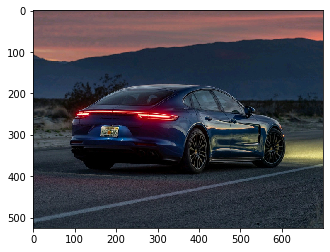

In [16]:
import matplotlib.pyplot as plt

from cv2 import imread

# load the input image using the Keras helper utility while ensuring
# the image is resized to ‘inputShape‘, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] loading and pre-processing image...")
image = imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [17]:
from utils.image_preprocessor import AspectAwarePreprocessor
from utils.image_preprocessor import ImageToArrayPreprocessor
from utils.image_preprocessor import ImagePreprocessor

width, height = inputShape
aap = AspectAwarePreprocessor(width, height)
itap = ImageToArrayPreprocessor()
ip = ImagePreprocessor([aap, itap])

images = image[np.newaxis, :, :, :]
images = ip.preprocess(images)

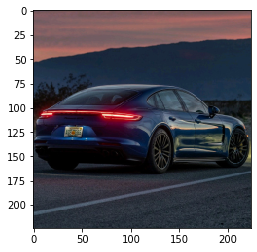

In [18]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

In [19]:
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
images = preprocess(images)

In [20]:
# classify the image
print("[INFO] classifying image with ’{}’...".format(model))
preds = model.predict(images)
P = imagenet_utils.decode_predictions(preds)

# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with ’<keras.engine.training.Model object at 0x7fdfbc045518>’...
1. sports_car: 38.43%
2. beach_wagon: 14.48%
3. convertible: 13.55%
4. car_wheel: 10.27%
5. racer: 9.90%


Well Done